In [1]:
import warnings
warnings.filterwarnings('ignore')

import dynamo as dyn

In [2]:
dyn.get_all_dependencies_version()

package anndata colorcet cvxopt dynamo-release hdbscan loompy matplotlib  \
version   0.7.5    2.0.2  1.2.5         0.95.2  0.8.26  3.0.6      3.3.3   

package numdifftools pandas pynndescent python-igraph scikit-learn seaborn  \
version       0.9.39  1.1.5       0.5.1         0.8.3       0.24.0  0.11.1   

package statsmodels    tqdm  trimap umap-learn   numba   numpy  scipy  \
version      0.12.1  4.56.0  1.0.14      0.4.6  0.49.0  1.18.5  1.4.1   

package           setuptools  
version  46.1.3.post20200325

In [9]:
dyn.configuration.set_figure_params('dynamo', background='white')

In [10]:
adata = dyn.sample_data.zebrafish()

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [11]:
dyn.pp.recipe_monocle(adata)

AnnData object with n_obs × n_vars = 4181 × 16940
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'Cell_type', 'umap_1', 'umap_2', 'batch', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr'
    var: 'pass_basic_filter', 'score', 'log_cv', 'log_m', 'use_for_pca', 'ntr'
    uns: 'velocyto_SVR', 'pp_norm_method', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection'
    obsm: 'X_pca', 'X'
    layers: 'spliced', 'unspliced', 'X_spliced', 'X_unspliced'

In [12]:
dyn.tl.dynamics(adata, model='stochastic', cores=8)

AnnData object with n_obs × n_vars = 4181 × 16940
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'Cell_type', 'umap_1', 'umap_2', 'batch', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr'
    var: 'pass_basic_filter', 'score', 'log_cv', 'log_m', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics'
    uns: 'velocyto_SVR', 'pp_norm_method', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics'
    obsm: 'X_pca', 'X'
    layers: 'spliced', 'unspliced', 'X_spliced', 'X_unspliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'moments_con'

<Figure size 600x400 with 0 Axes>

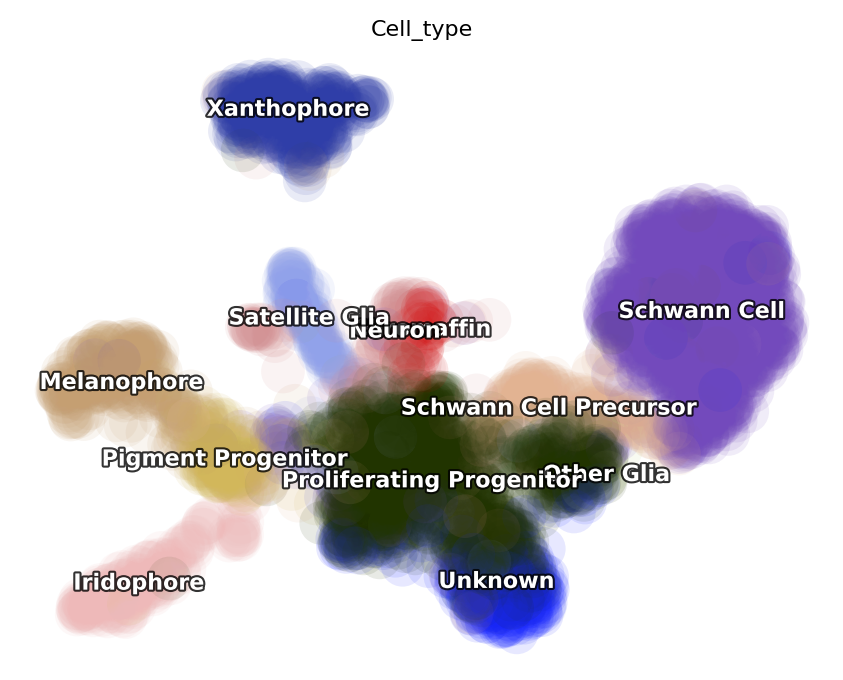

In [13]:
dyn.tl.reduceDimension(adata)

dyn.pl.umap(adata, color='Cell_type')

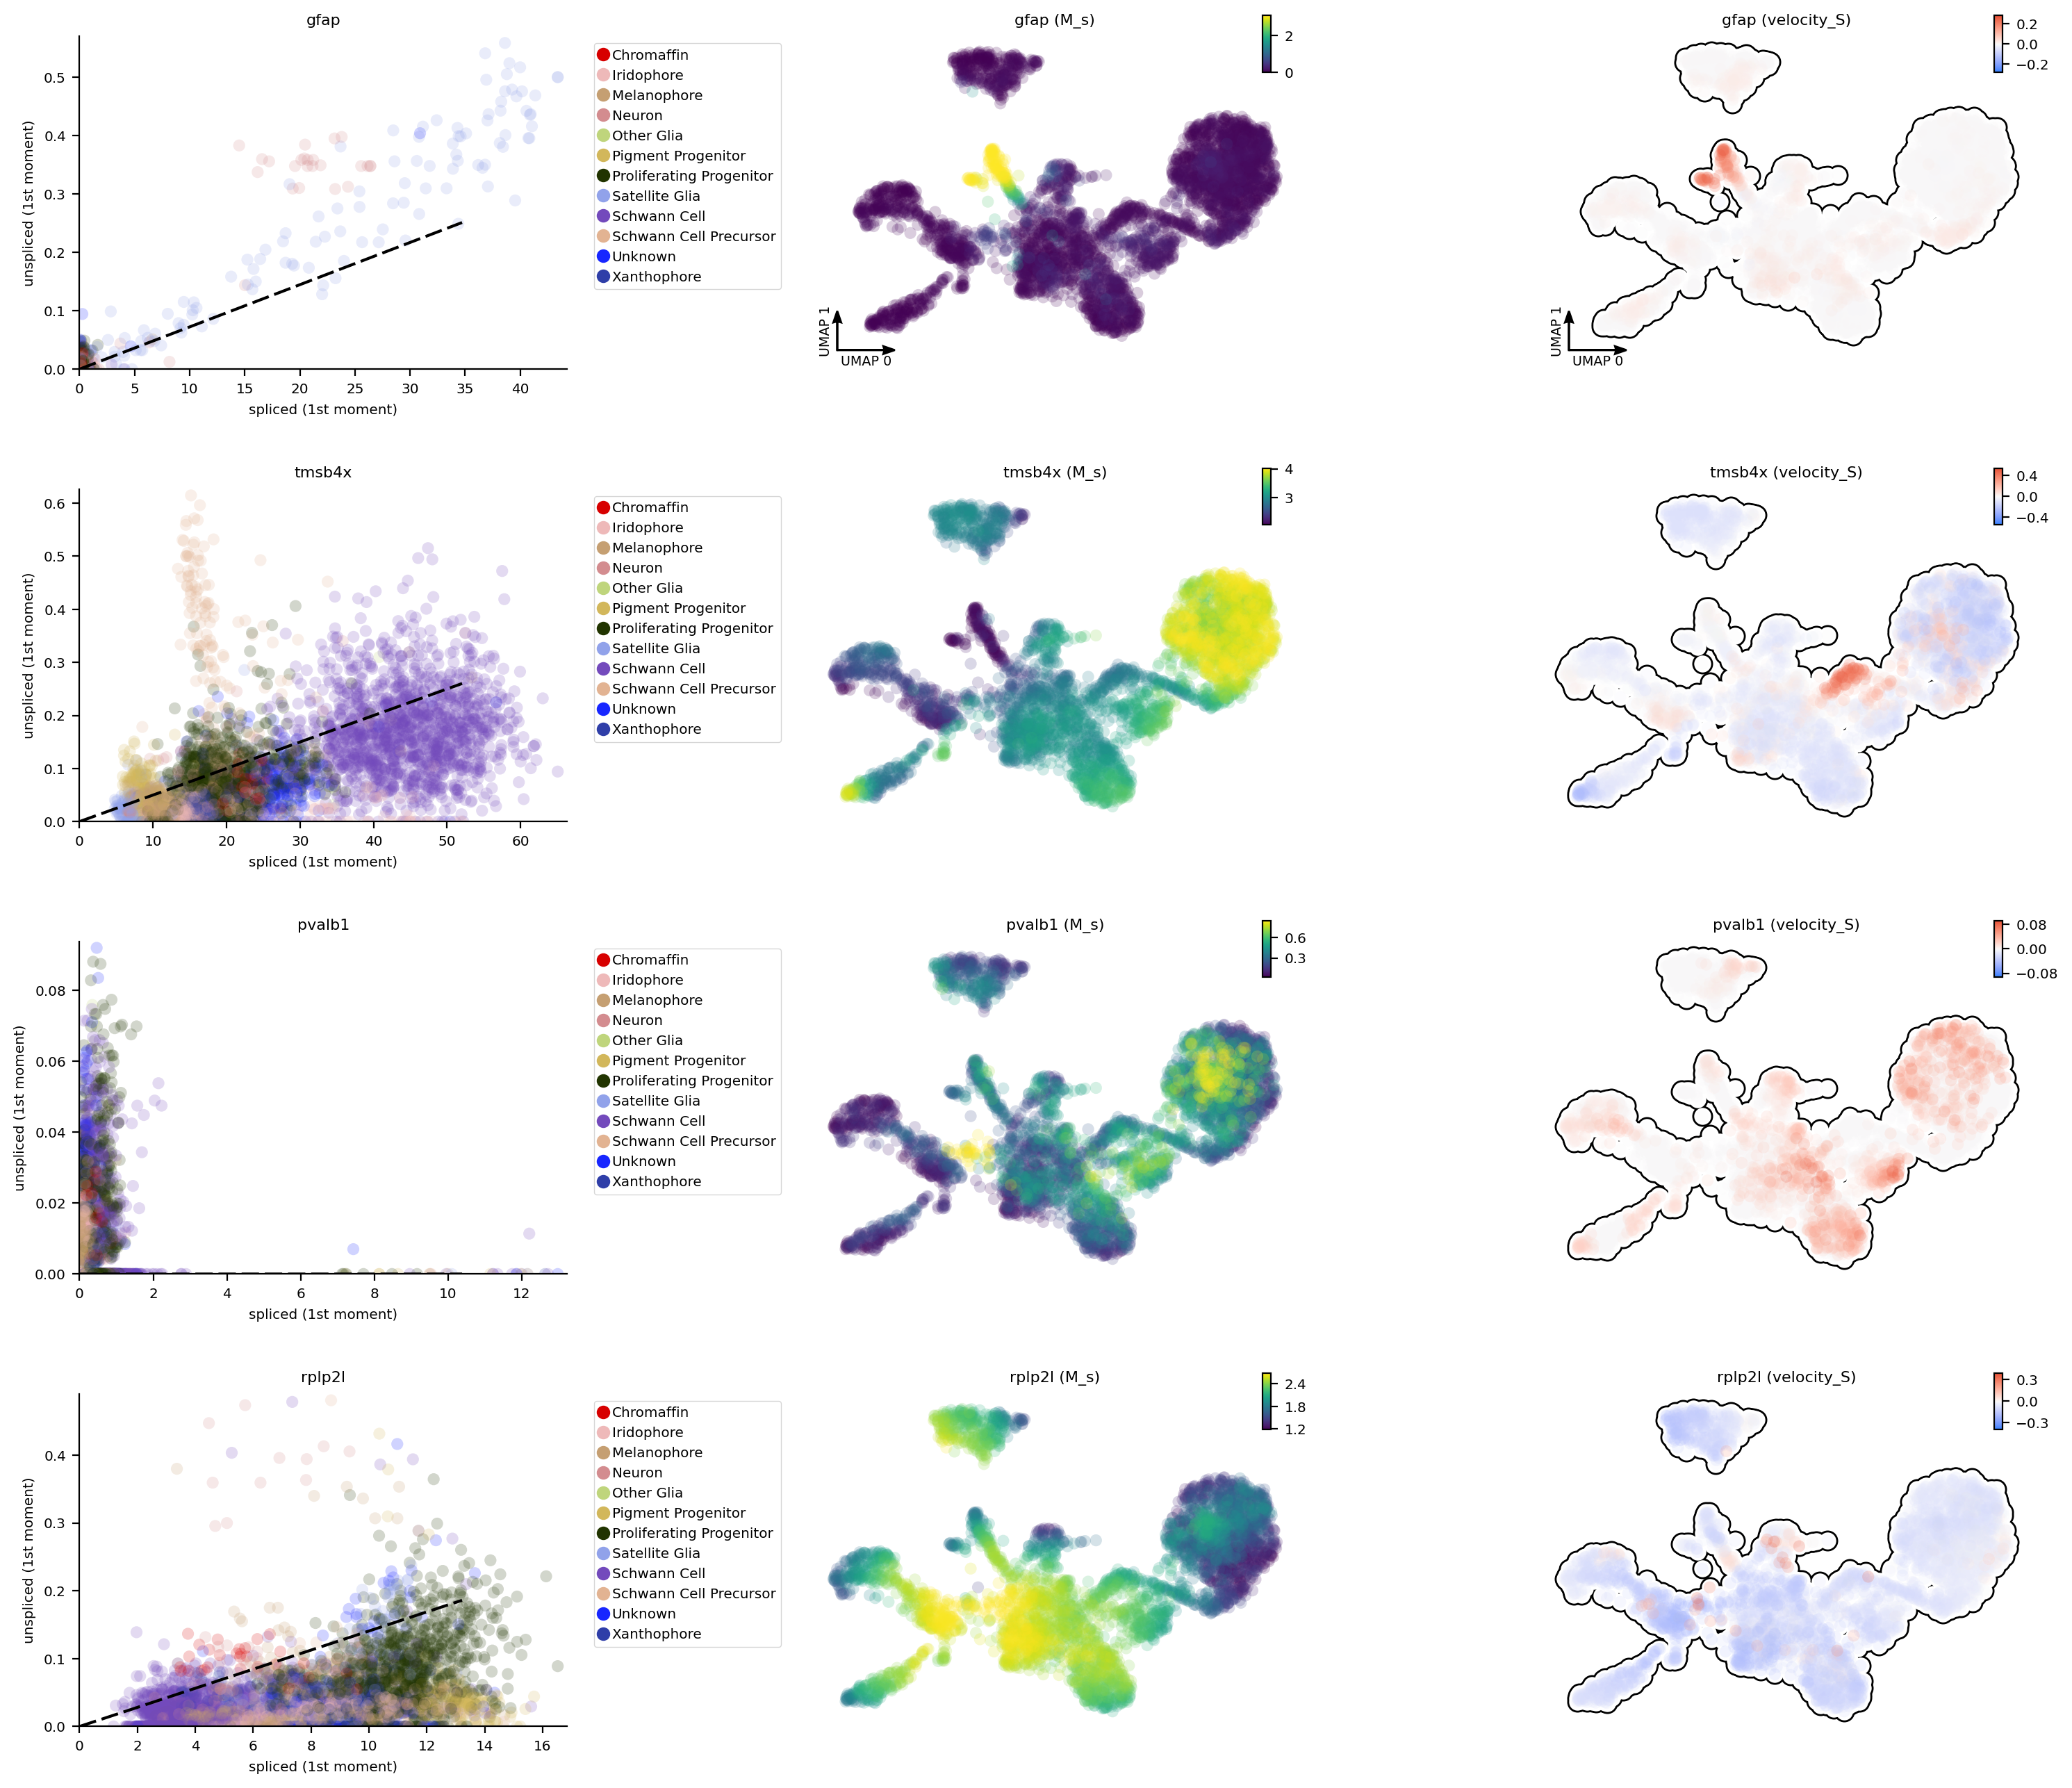

In [14]:
dyn.pl.phase_portraits(adata, genes=adata.var_names[adata.var.use_for_dynamics][:4], figsize=(6, 4), color='Cell_type')

In [15]:
dyn.tl.cell_velocities(adata, method='pearson', other_kernels_dict={'transform': 'sqrt'})

calculating transition matrix via pearson kernel with sqrt transform.: 100%|██████████| 4181/4181 [00:08<00:00, 484.00it/s]
projecting velocity vector to low dimensional embedding...: 100%|██████████| 4181/4181 [00:00<00:00, 5085.94it/s]


AnnData object with n_obs × n_vars = 4181 × 16940
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'Cell_type', 'umap_1', 'umap_2', 'batch', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr'
    var: 'pass_basic_filter', 'score', 'log_cv', 'log_m', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'velocyto_SVR', 'pp_norm_method', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'umap_fit', 'grid_velocity_umap'
    obsm: 'X_pca', 'X', 'X_umap', 'velocity_umap'
    layers: 'spliced', 'unspliced', 'X_spliced', 'X_unspliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'moments_con', 'connectivitie

<Figure size 600x400 with 0 Axes>

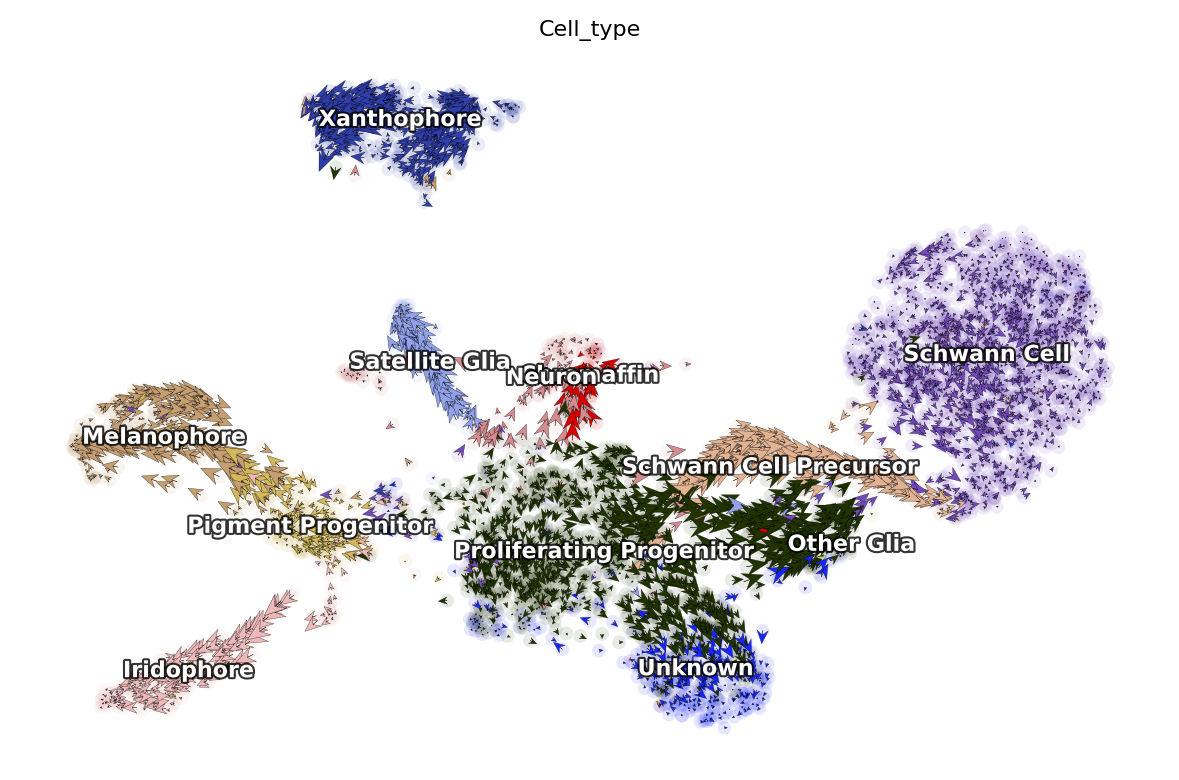

In [17]:
dyn.pl.cell_wise_vectors(adata, color=['Cell_type'], basis='umap', show_legend='on data', quiver_length=6, quiver_size=6, pointsize=0.1, show_arrowed_spines=False)

<Figure size 600x400 with 0 Axes>

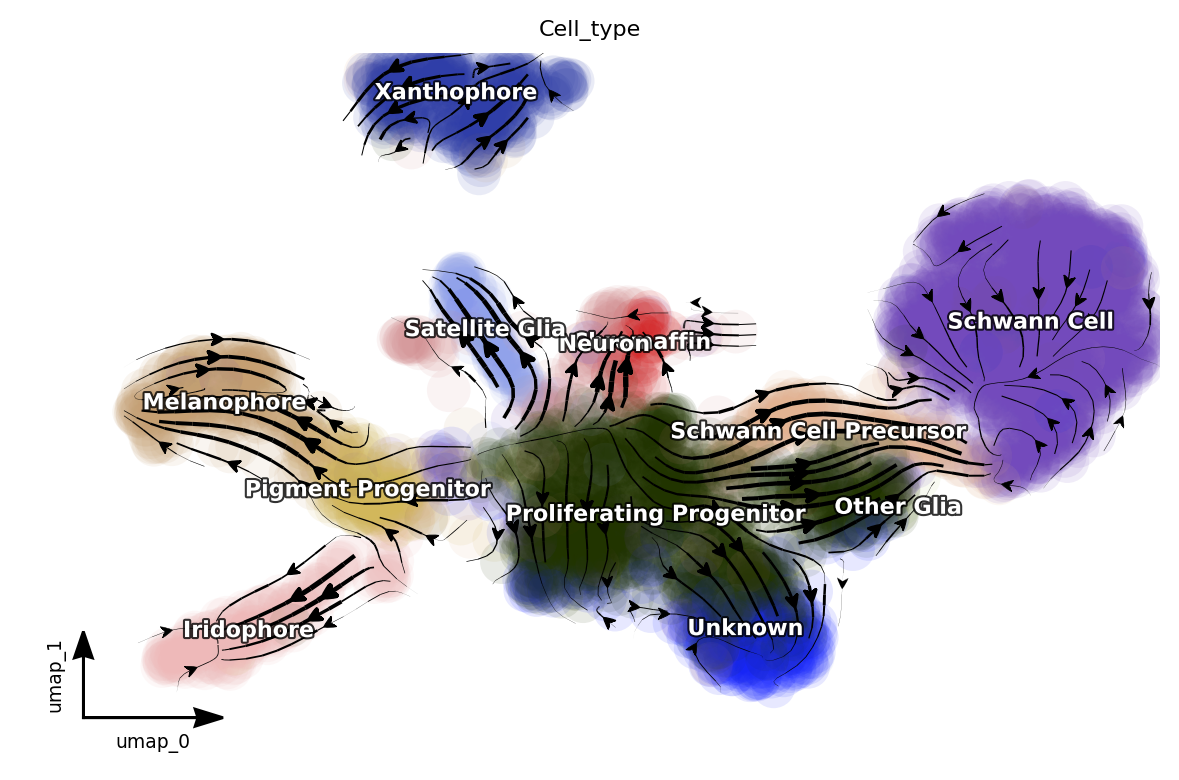

In [18]:
dyn.pl.streamline_plot(adata, color=['Cell_type'], basis='umap', show_legend='on data', show_arrowed_spines=True)

In [19]:
# you can set `verbose = 1/2/3` to obtain different levels of running information of vector field reconstruction
dyn.vf.VectorField(adata, basis='umap', M=1000, pot_curl_div=True)

Constructing diffusion graph from reconstructed vector field: 4181it [02:37, 26.53it/s]
Calculating divergence: 100%|██████████| 4181/4181 [00:00<00:00, 11903.47it/s]


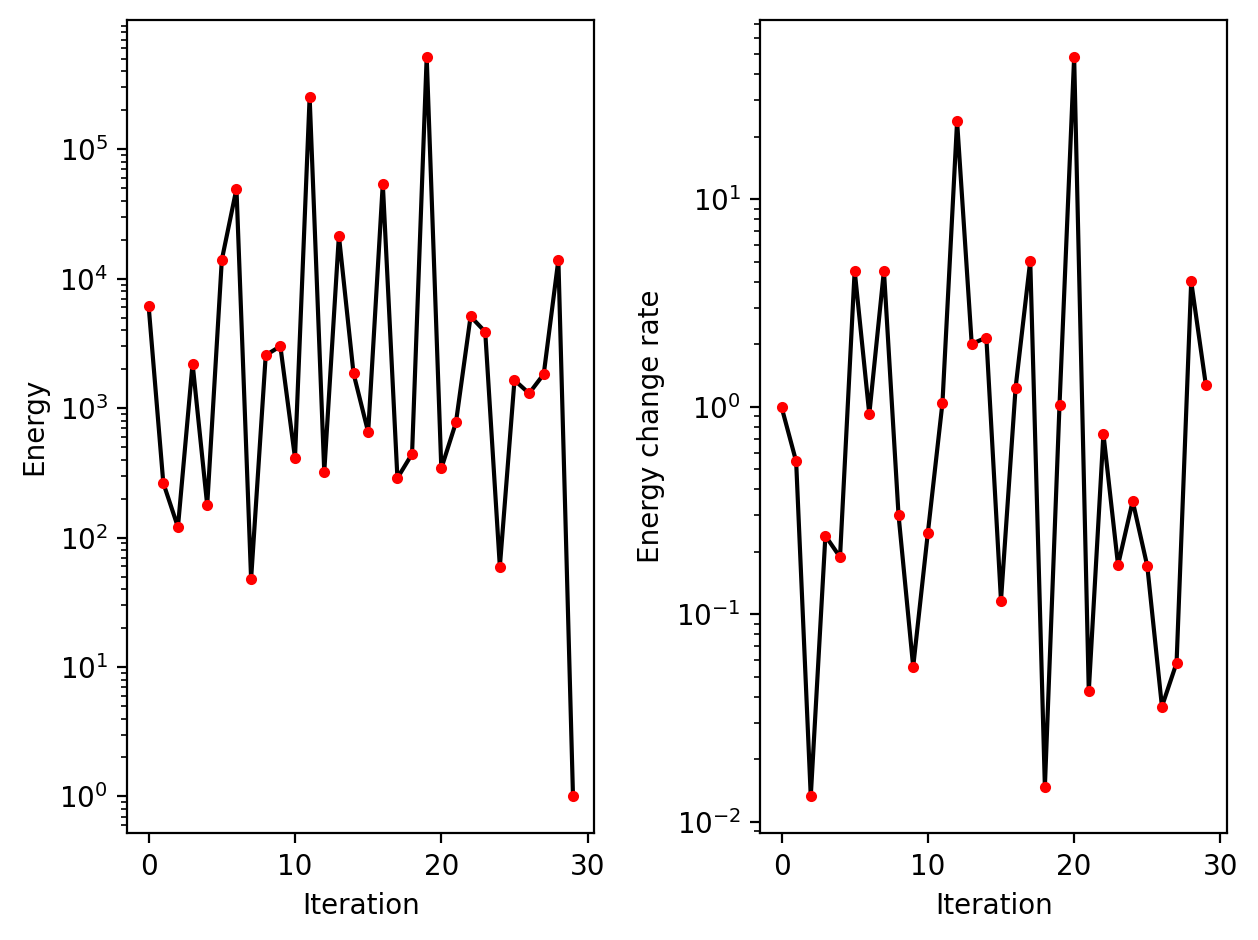

In [20]:
dyn.pl.plot_energy(adata)

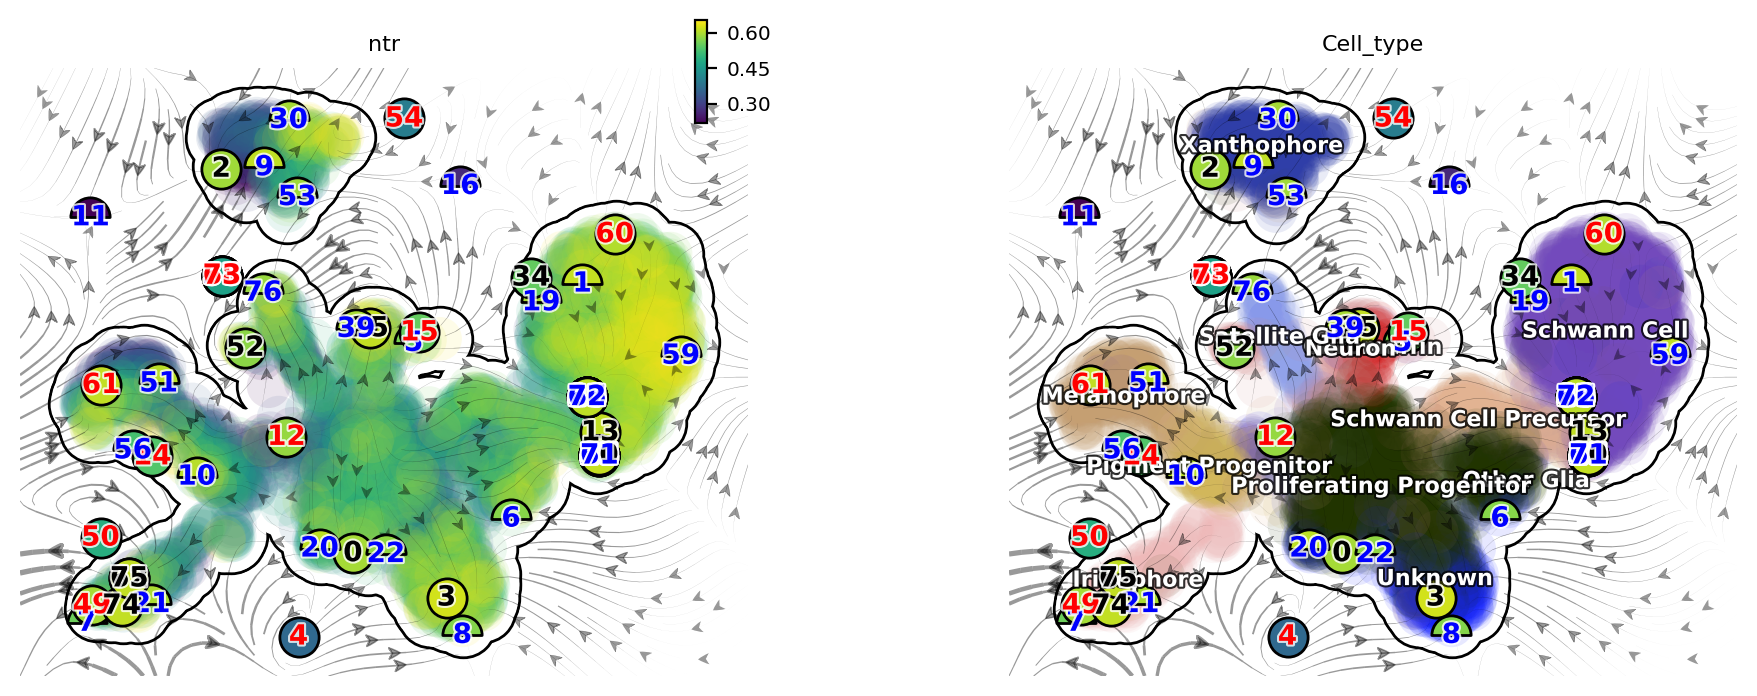

In [21]:
dyn.pl.topography(adata, basis='umap', background='white', color=['ntr', 'Cell_type'], streamline_color='black', show_legend='on data', frontier=True)